# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [4]:
#function
import statsmodels.formula.api as smf
lm = smf.ols(formula='admit ~ prestige', data=df_raw).fit()

In [5]:
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     24.56
Date:                Mon, 15 May 2017   Prob (F-statistic):           1.07e-06
Time:                        22:19:29   Log-Likelihood:                -248.52
No. Observations:                 399   AIC:                             501.0
Df Residuals:                     397   BIC:                             509.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6112      0.064      9.585      0.000         0.486     0.737
prestige      -0.1188      0.024     -4.955      0.000        -0.166    -0.072
==============================================================================
Omnibus:                      277.527   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.297
Skew:                           0.726   Prob(JB):                     1.33e-13
Kurtosis:                       1.793   Cond. No.                         8.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: 
GRE has a wider score range than GPA:
GRE score reports on a 0-800 scale
GPA score reports on a 1-4 score scale

#### Question 4. Drop data points with missing data


In [8]:
df_raw.dropna()
df_nonnull=df_raw.dropna()
df_nonnull.describe()
print (df_nonnull.describe())


            admit         gre         gpa    prestige
count  397.000000  397.000000  397.000000  397.000000
mean     0.317380  587.858942    3.392242    2.488665
std      0.466044  115.717787    0.380208    0.947083
min      0.000000  220.000000    2.260000    1.000000
25%      0.000000  520.000000    3.130000    2.000000
50%      0.000000  580.000000    3.400000    2.000000
75%      1.000000  660.000000    3.670000    3.000000
max      1.000000  800.000000    4.000000    4.000000
            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [9]:
# return a data set with missing data
print (df_raw.describe())

            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


#### Question 6. Create box plots for GRE and GPA

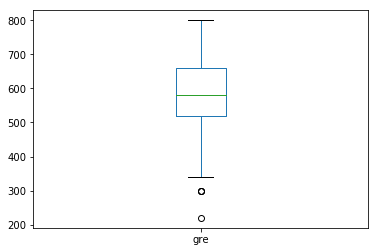

In [11]:
#boxplot GRE
df_raw['gre'].plot(kind='box')

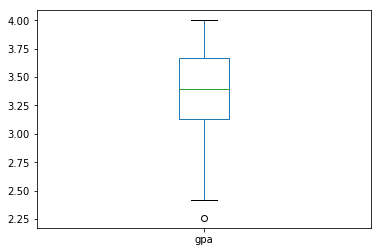

In [13]:
#boxplot GPA 
df_raw['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: 
GRE has a wider range of the variances

GRE:
Median: 570
Max: 800
25%: 300-500
75%: 650-800
Outliner: 210, 300

GPA:
Median: 3.4
Max: 4.0
25%: 2.4-3.2
75%: 3.6-4.0
Outliner: 2.25

#### Question 8. Describe each distribution 

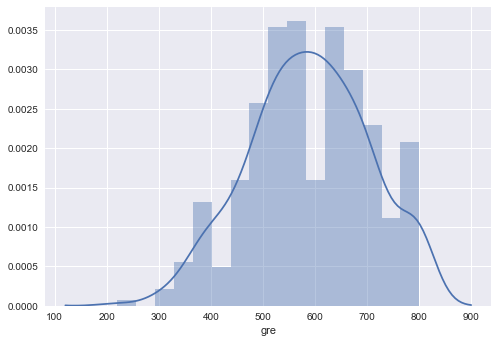

('Sample mean:', 587.8589420654912)


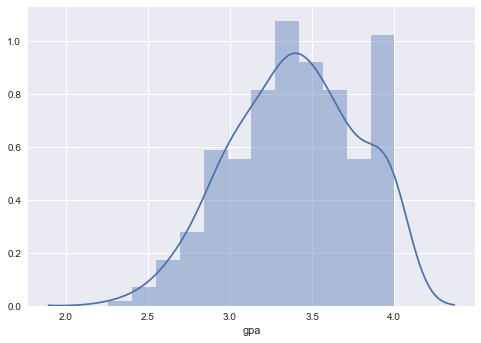

('Sample mean:', 3.3922418136020167)


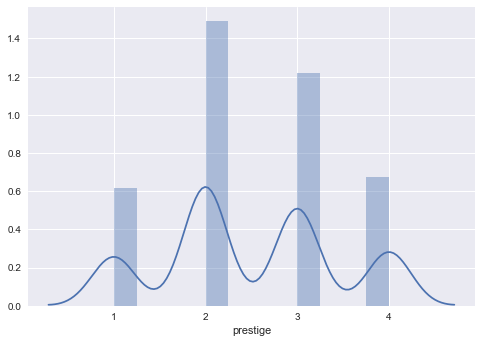

('Sample mean:', 2.4886649874055418)


In [16]:
# plot the distribution of each variable 
import seaborn as sns
sns.distplot(df_nonnull['gre'])
sns.plt.show()

mean_gre = np.mean(df_nonnull['gre'])
dev_gre = np.std(df_nonnull['gre']) / np.sqrt(df_nonnull['gre'])

print ("Sample mean:", mean_gre)
#print ("Confidence interval:", "({}, {})".format(mean - 2*dev, mean + 2*dev))


sns.distplot(df_nonnull['gpa'])
sns.plt.show()

mean_gpa = np.mean(df_nonnull['gpa'])
dev_gpa = np.std(df_nonnull['gpa']) / np.sqrt(df_nonnull['gpa'])

print ("Sample mean:", mean_gpa)
#print ("Confidence interval:", "({}, {})".format(mean - 2*dev, mean + 2*dev))


sns.distplot(df_nonnull['prestige'])
sns.plt.show()

mean_prestige = np.mean(df_nonnull['prestige'])
dev_prestige = np.std(df_nonnull['prestige']) / np.sqrt(df_nonnull['prestige'])

print ("Sample mean:", mean_prestige)
#print ("Confidence interval:", "({}, {})".format(mean - 2*dev, mean + 2*dev))

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: It rougly meets the requirement, it is overall a normal distribution but not exact.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Looking at the graphs above is roughly a normal distribution but not exact, to get a more accurate result instead of an estimated result some correction might help by removing outliners.

#### Question 11. Which of our variables are potentially colinear? 

In [17]:
# create a correlation matrix for the data
df_nonnull.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: Variables are not potentially colinear

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
Look at the correlation and p value (null hypothesis) to determine if "prestige of undergraduate schools" is a significant variable to "grad school admissions".

Data evaluation process: graph the variables, look for NA values, and find outliers.

#### Question 14. What is your hypothesis? 

Answer: The null hypothesis is that "prestige of undergraduate schools" is NOT significant to "grad school admissions". If the null is rejected it would prove that "prestige of undergraduate schools" has some significant to "grad school admissions"

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data